# chap8. 자연어 처리 시작하기

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

- `konlpy`, `JPype1-py3`(JDK 설치 필요), `wordcloud`, `gensim`
- pip로 설치하면 됨.

```python
>>> import nltk
>>> nltk.download()
```

- All Packages -> stopwords, punkt 설치

## 8-2. 한글 자연어 처리 기초

- `KoNLPy`는 꼬꼬마, 한나눔 등의 엔진을 사용할 수 있게 해줌

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

- 꼬꼬마 모듈 사용

In [13]:
kkma.sentences('한국어 분석을 시작합니다 재미있어욤~~')

['한국어 분석을 시작합니다', '재미있어욤~~']

- 문장(sentences) 분석
- 마침표(`.`)가 없어도 두 개의 문장으로 구분

In [2]:
kkma.nouns('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석']

- 명사(nouns) 분석도 수행

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

- 형태소(pos) 분석도 수행
- 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근할 수 없음
- 최소한의 의미인 형태소로 언어를 분석하는 것이 일반적

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

- 한나눔 모듈 사용

In [6]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있어욤', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있어욤', 'N'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Twitter
t = Twitter()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '욤']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '을', '시작합', '니다', '재미있어', '욤', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작합', 'Verb'),
 ('니다', 'Eomi'),
 ('재미있어', 'Adjective'),
 ('욤', 'Noun'),
 ('~~', 'Punctuation')]

## 8-3. 워드 클라우드

- 워드 클라우드(word cloud)는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알림

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [15]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add('said')

- 이상한 나라의 앨리스 영문 버전과 앨리스 그리을 저장
- 'said'라는 단어는 카운트에서 제거(너무 많이 나옴)

In [16]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Unknown system.')
    
%matplotlib inline

- matplotlib에서 한글 폰트 설정

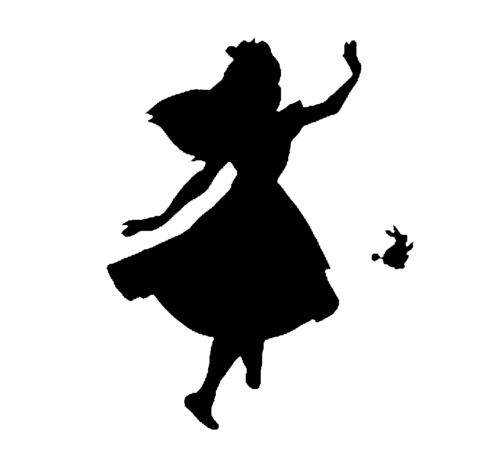

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

- 문서 자체에서 단어를 카운트하는 기능을 사용해 최빈 단어를 찾음

In [18]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

- 결과를 앨리스 그림에 겹쳐 보이기

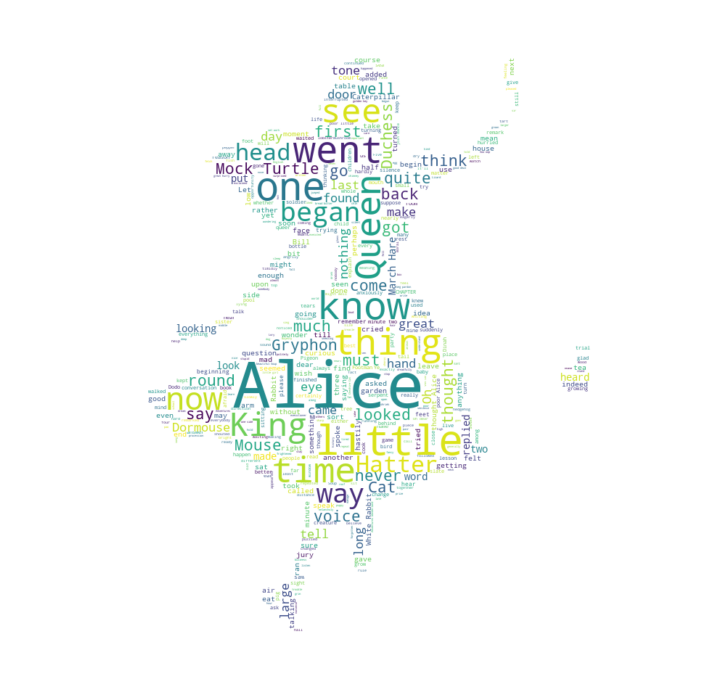

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 스타워즈의 A New Hope 텍스트로 실습

In [20]:
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

- 특수하게 처리해야 할 단어를 처리

In [21]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

- 워드 클라우드 준비

In [22]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

- 전체적으로 회색(grey)으로 채우도록 함수 생성

In [25]:
import random
def grey_color_func(word, font_size, position, orientation,
                   random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

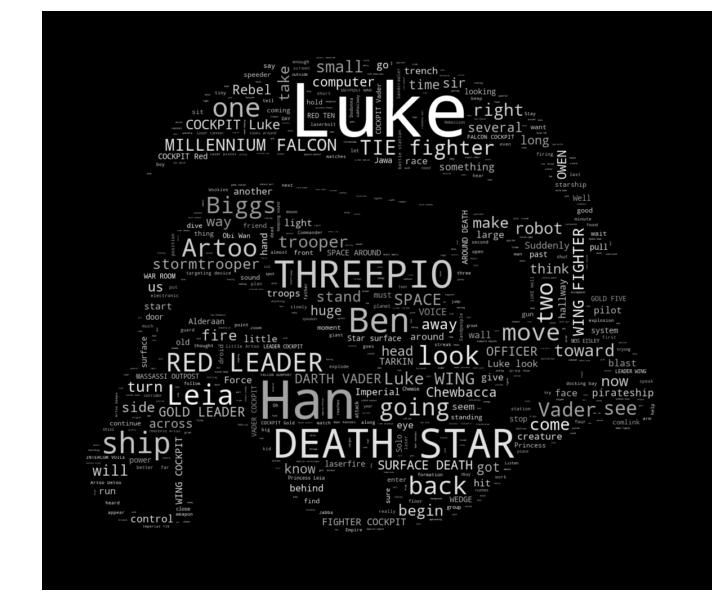

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 8-4. 육아휴직 관련 법안에 대한 분석

In [27]:
import nltk

In [28]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

- KoNLPy의 내부 문서 중 육아휴직 관련 법안 제 1809890호를 읽음
- 이 법률은 공무원에 한정되지만 육아휴직 대상이 되는 아이의 나이를 만 6세에서 만 8세로 확장하는 내용을 담고 있음

In [29]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

- Twitter 분석기로 명사를 분석

In [30]:
from konlpy.tag import Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '조제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',


- 수집된 단어의 횟수와 고유횟수(set)를 확인

In [31]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [33]:
print(len(ko.tokens))  # return number of tokens(document length)
print(len(set(ko.tokens)))  # return number of unique tokens
ko.vocab  # return frequency distribution

735
258


<bound method Text.vocab of <Text: 대한민국 국회 의안 제 1809890호>>

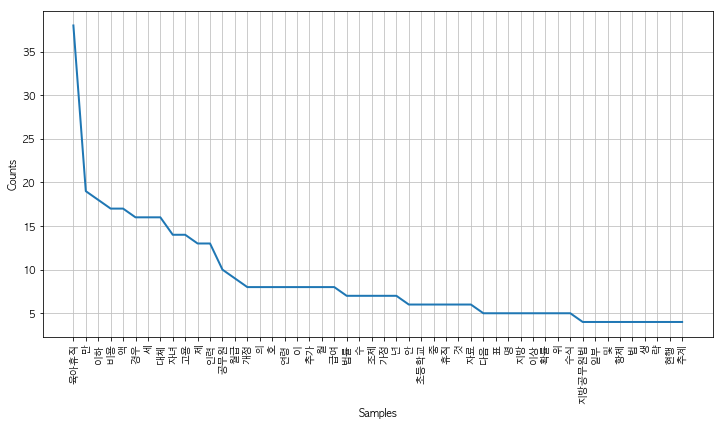

In [34]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

- 많이 등장한 순으로 plot
- 당연히 '육아휴직'이 가장 많이 등장
- 한글은 영어와 달리 stopwords를 지정하기 어려움 (의미 없는 단어도 등장)
- case by case로 지정

In [35]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '조제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '어',
 '느',
 '하나',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 

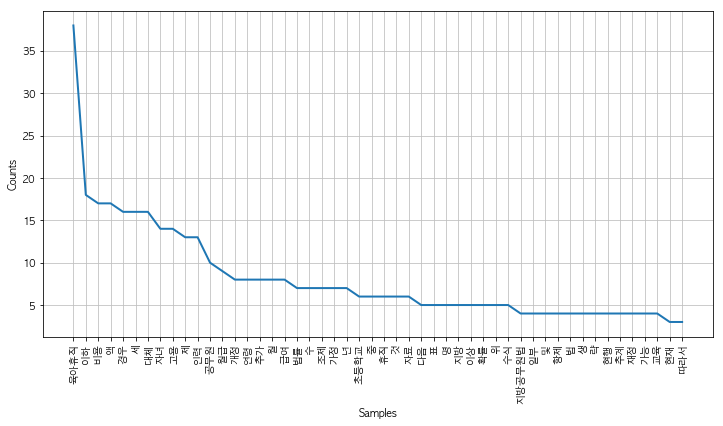

In [36]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)   # plot sorted frequency of top 50 tokens
plt.show()

In [37]:
ko.count('초등학교')

6

- 어떤 단어가 문서 내에서 몇 번 언급되는지 확인

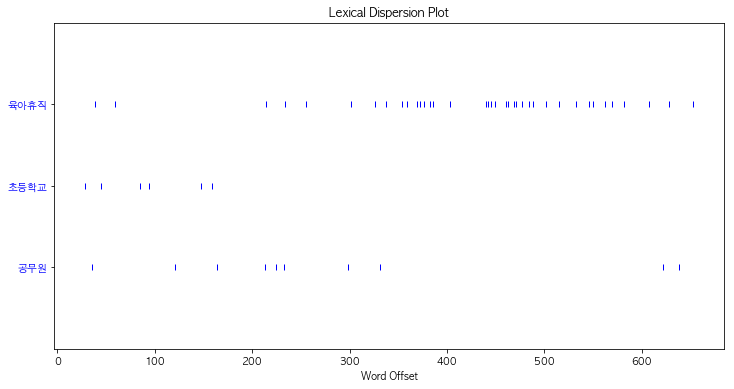

In [38]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

- 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있음

In [39]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 
 필요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임 
 개정 법률 지방공무원법 일부 다음 개정 제 조제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부
 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현 행
명 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 이하 여 여자 공무원 자녀 임신 출산 때 생 략 생 략 현행 


- 문서 내에서 어떤 단어들이 연어(collocation)로 사용되었는지 알 수 있음

In [40]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


- 워드 클라우드 적용

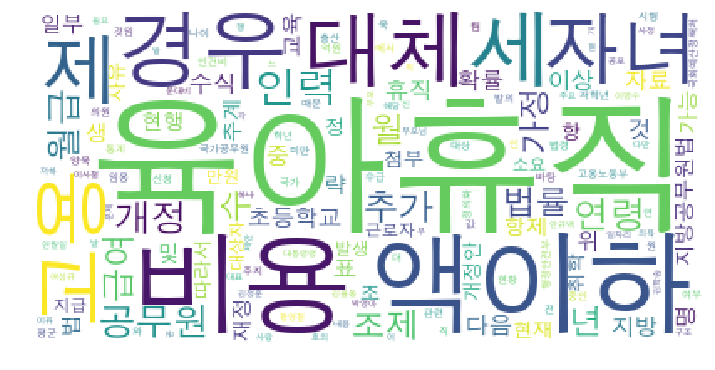

In [41]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 8-5. Naive Bayes Classifire의 이해 - 영문

In [42]:
from nltk.tokenize import word_tokenize
import nltk

In [43]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

- 연습용(train)데이터로 4개의 문자 입력

In [44]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

- train 문장에서 사용된 전체 단어를 찾음

In [45]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'me': False,
   'her': False,
   'i': True,
   'you': True,
   'hate': False,
   'like': True},
  'pos'),
 ({'me': False,
   'her': False,
   'i': True,
   'you': True,
   'hate': True,
   'like': False},
  'neg'),
 ({'me': True,
   'her': False,
   'i': False,
   'you': True,
   'hate': False,
   'like': True},
  'neg'),
 ({'me': False,
   'her': True,
   'i': True,
   'you': False,
   'hate': False,
   'like': True},
  'pos')]

- 위에서 찾은 단어들이 train 문장에 속한 단어인지 기록

In [46]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0


- train 문장에 붙은 긍정/부정 태그를 이용해서 분류한 결과 'hate'라는 단어가 없을 때(False) 긍정일 비율이 1.7:1이라는 의미
- 'like'라는 단어는 3번 사용되었고, 그중 2개의 문자잉 긍정의 의미
- 그래서 'like'가 있을때(True) 긍정일 확율이 1.7:1

In [47]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}
test_sent_features

{'me': False,
 'her': False,
 'i': True,
 'you': False,
 'hate': False,
 'like': True}

- 다른 테스트 문장으로 분류기를 통과

In [48]:
classifier.classify(test_sent_features)

'pos'

- 'naive'하지만 잘 동작한다는 평가를 받는 것이 Naive Bayes Classifier

## 8-6. Naive Bayes Classifier의 이해 - 한글

- 한글은 형태소 분석을 해야 함
- 형태소 분석을 하지 않은 경우를 먼저 살펴봄

In [49]:
from konlpy.tag import Twitter
from nltk.tokenize import word_tokenize
import nltk

In [50]:
pos_tagger = Twitter()

In [51]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [52]:
all_words = set(word.lower() for sentence in train 
                               for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

- '고양이도','고양이야'와 '메리가','메리는','메리랑'은 서로 다른 단어로 잡힘

In [53]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                for x in train]
t

[({'좋아': True,
   '이쁜': False,
   '지루해': False,
   '수업이': False,
   '고양이도': False,
   '메리는': False,
   '고양이야': False,
   '메리가': True,
   '메리랑': False,
   '놀거야': False,
   '난': False,
   '마치고': False},
  'pos'),
 ({'좋아': True,
   '이쁜': False,
   '지루해': False,
   '수업이': False,
   '고양이도': True,
   '메리는': False,
   '고양이야': False,
   '메리가': False,
   '메리랑': False,
   '놀거야': False,
   '난': False,
   '마치고': False},
  'pos'),
 ({'좋아': False,
   '이쁜': False,
   '지루해': True,
   '수업이': True,
   '고양이도': False,
   '메리는': False,
   '고양이야': False,
   '메리가': False,
   '메리랑': False,
   '놀거야': False,
   '난': True,
   '마치고': False},
  'neg'),
 ({'좋아': False,
   '이쁜': True,
   '지루해': False,
   '수업이': False,
   '고양이도': False,
   '메리는': True,
   '고양이야': True,
   '메리가': False,
   '메리랑': False,
   '놀거야': False,
   '난': False,
   '마치고': False},
  'pos'),
 ({'좋아': False,
   '이쁜': False,
   '지루해': False,
   '수업이': False,
   '고양이도': False,
   '메리는': False,
   '고양이야': False,
   '메리가': False,
   '메리랑': True,
   '놀거

In [54]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0


- 형태소 분석을 하지 않은 분류기는 신뢰성이 낮음

In [55]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [57]:
test_sent_features = {word.lower():
                         (word in word_tokenize(test_sentence.lower()))
                             for word in all_words}
test_sent_features

{'좋아': False,
 '이쁜': False,
 '지루해': False,
 '수업이': True,
 '고양이도': False,
 '메리는': False,
 '고양이야': False,
 '메리가': False,
 '메리랑': True,
 '놀거야': True,
 '난': True,
 '마치고': False}

In [58]:
classifier.classify(test_sent_features)

'neg'

- 결과가 부정적(neg)으로 나옴
- 한글을 다룰 때는 형태소 분석이 필수

In [59]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [60]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [61]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [62]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

- 말뭉치에 있는 단어가 있는지 없는지를 구분하는 함수를 만들어서 train에 적용
- 조사(Josa)인지 명사(Noun)인지 구분이 잘 되어 있어서 판독이 쉬움

In [63]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

#### 분류기 동작

In [64]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [65]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [66]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거', 'Verb'),
 ('야', 'Eomi')]

In [67]:
classifier.show_most_informative_features()

Most Informative Features
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                  난/Noun = True              neg : pos    =      2.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0
                  야/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0


In [68]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거', 'Verb'): False,
 ('야', 'Eomi'): False}

In [69]:
classifier.classify(test_sent_features)

'pos'

- 의도한대로 긍적적(pos) 결과가 나옴

## 8-7. 문장의 유사도 측정

- 많은 문장이나 문서들 중에서 유사한 문장을 찾아내는 방법.
- 어떤 문장을 벡터로 표현할 수 있다면 벡터 간 거리를 구하는 방법으로 쉽게 해결이 가능

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
vectorizer = CountVectorizer(min_df=1)

- `scikit-learn`에서 텍스트의 특징(feature)을 추출하는 모듈에서 `CountVectorizer`라는 함수를 import

In [72]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

- 유사한 문장을 연습용으로 사용
- 실제로는 많은 문장을 사용해야 함

In [73]:
x = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [74]:
x.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

- 단어들은 feature로 잡음
- 문제는 '메리랑'과 '메리는'을 구분하는 것
- 첫 열이 8번 행에서 처음으로 1이 나타나는데 그것은 놀러가고라는 단어를 의미
- 거기서부처 두 단어 건너가 세번째 단어 자리에서 또 1이 나오는데 그건 '메리랑'을 의미

In [76]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [77]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [80]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [82]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f    : %s' % (i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45    : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24    : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65    : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46    : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


- 좀 더 한글 문장에 대한 벡터화를 합리적으로 진행

In [83]:
from konlpy.tag import Twitter
t = Twitter()

- KoNLPy의 Twitter를 이용해서 형태소 분서글 한 결과를 token으로 지정

In [84]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀', '러', '가고', '싶지', '만', '바쁜', '데', '어떻', '하', '죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해', '요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해', '요', '.', '이상해', '요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은',
  '데',
  '너무',
  '바빠',
  '서',
  '그러',
  '질',
  '못',
  '하고',
  '있어',
  '요']]

- 형태소 분석을 수행한 결과 '메리랑','메리는'을 메리로 분리해서 같은 단어로 구분
- 형태소 분석을 한 후 띄어쓰기로 구분하고 그 자체를 하나의 문장(sentence)으로 만들어서 `scikit learn`의 `vectorizer` 함수에서 사용하기 편하게 편집

In [85]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀 러 가고 싶지 만 바쁜 데 어떻 하 죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해 요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해 요 . 이상해 요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은 데 너무 바빠 서 그러 질 못 하고 있어 요']

- feature를 찾기

In [86]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

- 찾은 feature를 확인

In [87]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

- 리스트를 받고 다시 벡터화함

In [88]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

- 새로운 문장이 있으면 그 문장과 동일한 과정으로 벡터화해서 각 벡터들 사이의 거리를 구하면 됨

In [89]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어 요']

- '메리랑 공원에서 산책하고 놀고 싶어요'으로 동일한 과정을 거쳐 벡터화 함

In [90]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

- 새로운 문장(new_post_vec)과 비교해야 할 문장(contents)들 각각에 대해 거리를 구해야 함

In [91]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

- 두 벡터의 차를 구하고 난 결과의 norm을 구하는 함수를 생성

In [92]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f   : %s' % (i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.83   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [93]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print("-->", new_post)
print("--->", contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [94]:
for i in range(0, len(contents)):
    print(X.getrow(i).toarray())
    
print('--------------------')
print(new_post_vec.toarray())

[[1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
--------------------
[[0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


- 벡터화된 결과를 보면 4개의 contents 변수에 저장한 문장과 새로운 문장이 형태소 분석 후 벡터화된 결과를 확인 할 수 있음
- 거리를 구해야 함

In [95]:
def dist_normdist_nor(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

- 각 벡터의 norm을 나눠준 후 거리를 구하도록 함수를 생성

In [96]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_normdist_nor(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" % (i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.26   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


- 거리를 구한 결과가 조금 달라짐
- 가장 가까운 문장을 찾는 것에 대한 결과는 크게 다르지 않음

In [97]:
print(("Best post is %i, dist = %.2f" % (best_i, best_dist)))
print("-->", new_post)
print("--->", contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


- 여전히 같은 결과가 나옴
- `tfidf`라는 개념
- tf(term frequency)와 idf(inverse document frequency)는 텍스트 마이닝에서 사용하는 일종의 단어별로 가중치를 부과함
- tf는 어떤 단어가 문서 내에서 자주 등장할 수록 중요도가 높을 것으로 봄
- idf는 비교하는 모든 문서에 만약 같은 단어가 있다면 이 단어는 핵심 어휘일수도 있지만, 문서 간의 비교에서는 중요한 단어는 아니라는 뜻으로 봄

- 그 원리로 tfidf 함수를 생성

In [98]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D))/len([doc for doc in D if t in doc]))
    return tf, idf

In [99]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a, abb, abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


- 연습용 코드를 보면 모든 문장에 a가 있기 때문에 idf의 결과는 0
- 이 두 값을 곱한 것이 tfidf라고 하는 함수를 수정해서 사용해도 되지만
- `scilkit-learn`의 `TfidfVectorizer`를 import해서 사용해도 됨

In [100]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf * idf

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [102]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

- contents 문장들을 다듬음

In [103]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [104]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀 러 가고 싶네 요']

- 계속 사용하고 있는 테스트용 문장을 비교

In [105]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

- 다른 결과와 비교

In [106]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_normdist_nor(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" % (i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print("-->", new_post)
print("--->", contents[best_i])

== Post 0 with dist=1.03   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.13   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.10   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 1.03
--> ['근처 공원에 메리랑 놀러가고 싶네요']
---> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 8-8. 출산 선물 고르기

In [108]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Unknown system..')
    
plt.rcParams['axes.unicode_minus'] = False

In [109]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import urllib
import time

- 그래프에 대한 설정

In [120]:
tmp1 = 'https://search.naver.com/search.naver?where=nexearch'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('출산 선물')))

soup = bs(response, 'html.parser')
tmp = soup.find_all('dl')

- 테스트로 한 페이지에 대해서만 테스트 결과를 출력

In [121]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    신생아출산선물   아내출산선물   산모출산선물   산모선물   출산선물기저귀케익   아기선물   출산선물추천   출산인사   출산축하편지   출산산모선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 ' 받아본 경험자로서 좋은 출산선물 vs 안 좋은 출산선물 2018.03.24. 가족들이나 친구들 또는 지인들이 출산을 했다고 하면 선물을 해주고 싶잖아요. 그럴 때 대체 무엇을 해줘야 하나 고민하는 분들\xa0많은데, 출산선물을 받아본...   글쓰는 작가맘 이명숙   우리맘_육아어디까지해봤니?     명이 추천했습니다.  9  ',
 ' [육아발언대 32화]출산선물, 이게 제일 좋더라 2018.02.02. * 출산선물 준비 전, 체크 ✓ □ 현금 /\xa0□\xa0선물□ 아이를 위한 선물 /\xa0□\xa0산모를 위한 선물□ 늘 필요한 소모품 /\xa0□ 오래 쓰이는 물품□ 예상 가격대...   맘톡  공식  02.[공감]맘톡X맘키즈 : 육아발언대     명이 추천했습니다.  14  ',
 ' 신생아 출산선물 종류센스있는 선물 LIST 2018.03.05. 세상에 곧 나올 태아의 탄생을\xa0축복해주면서\xa0정성이 담긴 선물을 같이 전달하면받는 사람 입장에서는 그렇게 좋을 수가 없어요~이때 신생아 출산선물로 무엇을...   센트럴팜  공식  육아 정보     명이 추천했습니다.  42  ',
 '  신생아출산선물 정성 가득 담아 준비해봐요  2018.05.29.  신생아출산선물로 준비했답니다 사실 류부인님 첫째랑 다니가 같은 개월 수라 둘 다 약한 피부로 쪼꼬미 시절에 엄청 고생했었거든요 그래서 잘 맞는다는 말에 

- 네이버 개발자용 API를 이용하면 속도가 개선됨

In [123]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('출산 선물')))
    soup = bs(response, 'html.parser')
    tmp = soup.find_all('dl')
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(0.5)

In [124]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    신생아출산선물   아내출산선물   산모출산선물   산모선물   출산선물기저귀케익   아기선물   출산선물추천   출산인사   출산축하편지   출산산모선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 ' 받아본 경험자로서 좋은 출산선물 vs 안 좋은 출산선물 2018.03.24. 가족들이나 친구들 또는 지인들이 출산을 했다고 하면 선물을 해주고 싶잖아요. 그럴 때 대체 무엇을 해줘야 하나 고민하는 분들\xa0많은데, 출산선물을 받아본...   글쓰는 작가맘 이명숙   우리맘_육아어디까지해봤니?     명이 추천했습니다.  9  ',
 ' [육아발언대 32화]출산선물, 이게 제일 좋더라 2018.02.02. * 출산선물 준비 전, 체크 ✓ □ 현금 /\xa0□\xa0선물□ 아이를 위한 선물 /\xa0□\xa0산모를 위한 선물□ 늘 필요한 소모품 /\xa0□ 오래 쓰이는 물품□ 예상 가격대...   맘톡  공식  02.[공감]맘톡X맘키즈 : 육아발언대     명이 추천했습니다.  14  ',
 ' 신생아 출산선물 종류센스있는 선물 LIST 2018.03.05. 세상에 곧 나올 태아의 탄생을\xa0축복해주면서\xa0정성이 담긴 선물을 같이 전달하면받는 사람 입장에서는 그렇게 좋을 수가 없어요~이때 신생아 출산선물로 무엇을...   센트럴팜  공식  육아 정보     명이 추천했습니다.  42  ',
 '  신생아출산선물 정성 가득 담아 준비해봐요  2018.05.29.  신생아출산선물로 준비했답니다 사실 류부인님 첫째랑 다니가 같은 개월 수라 둘 다 약한 피부로 쪼꼬미 시절에 엄청 고생했었거든요 그래서 잘 맞는다는 말에 

In [125]:
len(present_candi_text)

2007

In [126]:
import nltk
from konlpy.tag import Twitter
t = Twitter()

In [127]:
# 하나의 글로 present_text 변수에 저장
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [128]:
# 형태소 분석을 마친 단어를 가지고 token을 모음
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함하는',
 '단어',
 '(+)',
 '제외하는',
 '단어',
 '(-)',
 '기본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이',
 '고자',
 '할',
 '때',
 '사용합',
 '니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분해서',
 '입력하세',
 '요',
 '.',
 '연관검색어',
 '도움말',
 '신생아',
 '출산',
 '선물',
 '아내',
 '출산',
 '선물',
 '산모',
 '출산',
 '선물',
 '산모',
 '선물',
 '출산',
 '선물',
 '기저귀',
 '케익',
 '아기',
 '선물',
 '출산',
 '선물',
 '추천',
 '출산',
 '인사',
 '출산',
 '축하',
 '편지',
 '출산',
 '산모',
 '선물',
 '닫기',
 '후',
 '1',
 '주일',
 '간',
 '유지됩',
 '니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시',
 '겠',
 '습니까',
 '?',
 '열기',
 '받아',
 '본',
 '경험',
 '자',
 '로서',
 '좋',
 '은',
 '출산',
 '선물',
 'vs',
 '안',
 '좋',
 '은',
 '출산',
 '선물',
 '2018',
 '.',
 '03',
 '.',
 '24',
 '.',
 '가족',
 '들',
 '이나',
 '친구',
 '들',
 '또는',
 '지인',
 '들',
 '이',
 '출산',
 '을',
 '했',
 '다고',
 '하면',
 '선물',
 '을',
 '해주고',
 '싶잖',
 '아요',
 '.',
 '그럴',
 '때',
 '대체',

In [129]:
ko = nltk.Text(tokens_ko, name='출산 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

136998
725


In [130]:
ko = nltk.Text(tokens_ko, name='출산 선물')
ko.vocab().most_common(100)

[('출산', 6513),
 ('선물', 6111),
 ('.', 4316),
 (',', 3310),
 ('...', 2205),
 ('요', 1801),
 ('을', 1704),
 ('이', 1603),
 ('과일', 1600),
 ('로', 1502),
 ('/', 1400),
 ('바구니', 1000),
 ('전', 905),
 ('에', 904),
 ('를', 903),
 ('검색', 900),
 ('데', 900),
 ('맘', 900),
 ('의', 805),
 ('?', 804),
 ('들', 803),
 ('아이', 802),
 ('2', 801),
 ('니다', 800),
 ('2018', 800),
 ('육아', 704),
 ('가', 702),
 ('아기', 701),
 ('신생아', 700),
 ('있는', 700),
 ('도', 700),
 ('다', 603),
 ('!', 602),
 ('서', 601),
 ('대', 600),
 ('^^', 600),
 ('내', 600),
 ('답변', 600),
 ('[', 503),
 (']', 503),
 ('는', 502),
 ('단어', 500),
 ('좋', 500),
 ('일', 500),
 ('고', 500),
 ('조카', 500),
 ('좀', 500),
 ('용품', 500),
 ('세트', 406),
 ('1', 405),
 ('수', 403),
 ('은', 402),
 ('위한', 402),
 ('때', 400),
 ('산모', 400),
 ('추천', 400),
 ('준비', 400),
 ('□', 400),
 ('....', 400),
 ('하고', 400),
 ('카페', 400),
 ('을까요', 400),
 ('..', 400),
 ('것', 400),
 ('주', 302),
 ('축하', 301),
 ('~', 301),
 ('랑', 301),
 ('적', 301),
 ('유아', 301),
 ('으로', 301),
 ('하나', 300),
 ('열기', 300)

In [136]:
ko.similar('선물')

세트 인사 바구니 주문 배송 배달


In [139]:
stop_words = ['2018','추천','하고','[',']','.',',','/','전','검색','서','^^','!','내','추천했','02','05','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='출산 선물')
ko.vocab().most_common(50)

[('출산', 6513),
 ('선물', 6111),
 ('과일', 1600),
 ('바구니', 1000),
 ('맘', 900),
 ('아이', 802),
 ('육아', 704),
 ('아기', 701),
 ('신생아', 700),
 ('조카', 500),
 ('용품', 500),
 ('세트', 406),
 ('위한', 402),
 ('산모', 400),
 ('준비', 400),
 ('□', 400),
 ('카페', 400),
 ('을까요', 400),
 ('축하', 301),
 ('랑', 301),
 ('적', 301),
 ('유아', 301),
 ('열기', 300),
 ('본', 300),
 ('03', 300),
 ('이나', 300),
 ('친구', 300),
 ('\xa0', 300),
 ('_', 300),
 ('니', 300),
 ('명', 300),
 ('센스', 300),
 ('거든요', 300),
 ('걸', 300),
 ('소중한', 300),
 ('많이', 300),
 ('던', 300),
 ('된', 300),
 ('싶', 300),
 ('첫', 300),
 ('드려', 300),
 ('괜찮', 300),
 ('고민', 300),
 ('-', 300),
 ('주문', 300),
 ('배송', 300),
 ('배달', 300),
 ('저', 203),
 ('베이비', 203),
 ('만', 202)]

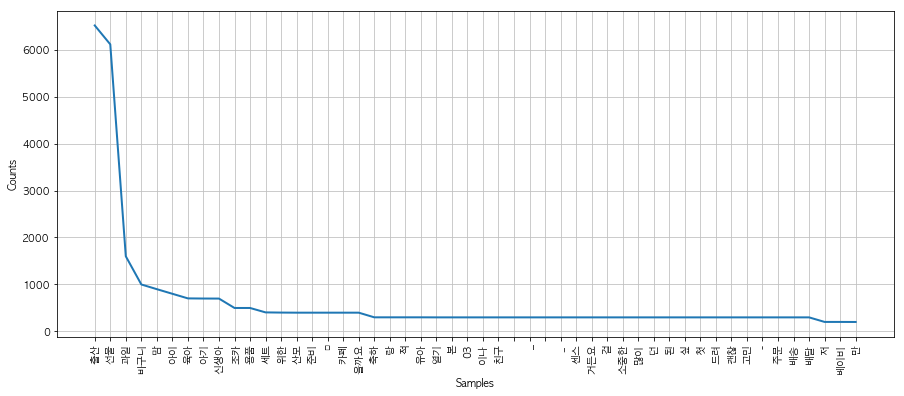

In [140]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

- 워드 클라우드를 그리기 위한 모듈 import

In [141]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

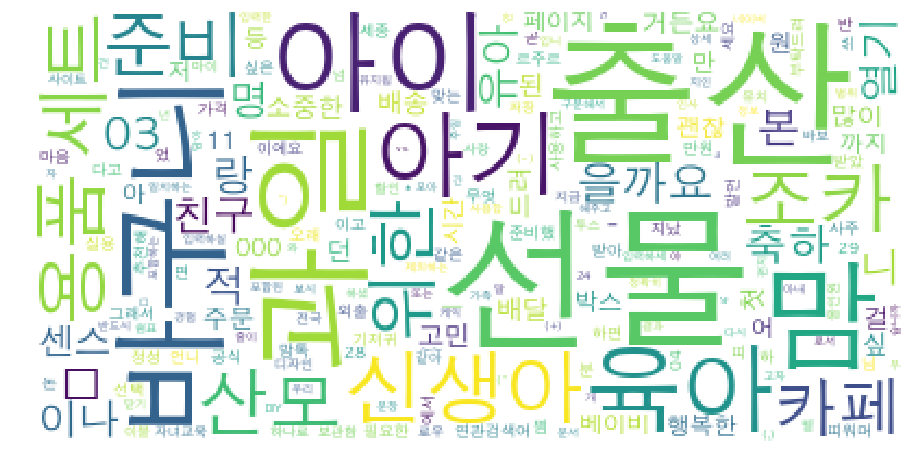

In [142]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling=0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [143]:
# 특정 이미지로 마스킹
mask = np.array(Image.open('../data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [151]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='/Labrary/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.1,
                      mask=mask,
                      background_color = 'white',
                      min_font_size=1,
                      max_font_size=100
                      ).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

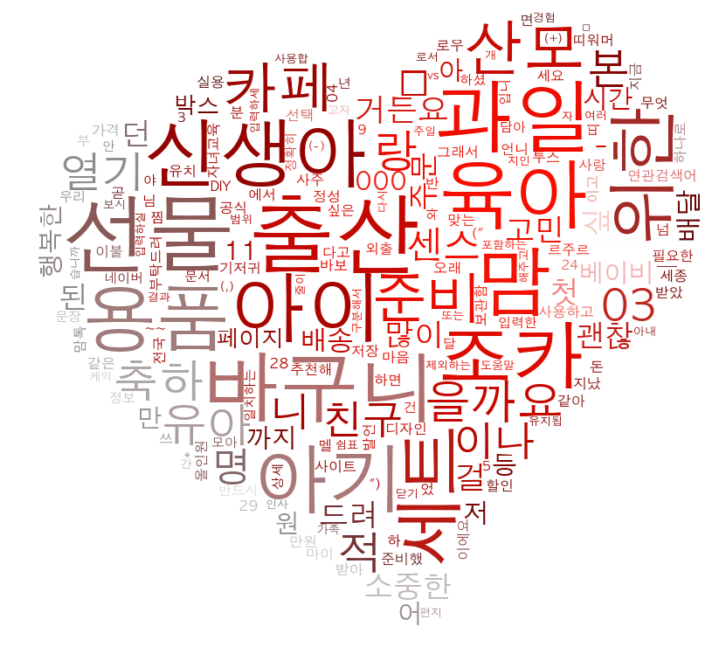

In [152]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

- 자연어 처리에서 `word2vec`를 지원하는 `gensim`을 사용해서 조사나 어미 등을 제거

In [153]:
import gensim
from gensim.models import word2vec

In [154]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아

출산 선물 좀 보다 2 일 전 이렇다 어떻다 돈 주기다 애매 요 출산 선물 주다 어떻다 요 아니다 5 만원 선 추천 좀 부탁드리다 여자 아이 딸 내다 가을 출산 예정 세종 맘 카페 세종 맘 들 행복하다 이 대 표cafe.naver.com/no1se 카페 내 검색
친구 출산 선물 3 시간 전 출산 1 달이 지나다 출산 선물 사주 려고 하다 베넷 저고리 바디 수트 짱구 베다 등 세트 있다 늦다 사주 싶다 필요없다 다 준비 되다 레몬 테라스 인테리어 리폼 DIY 요리 결혼 대 표cafe.naver.com/remonterra 카페 내 검색
첫 아이 출산 선물 추천 부 틱 드리다 2 일 전 알다 분 2 달 정도 뒤 출산 하다 출산 선물 하다 어서 첫 아이 출산 나이 30 대초 반 이다 출산 후 받다 선물 받다 선물 생각나다 추천 부탁드리다 브랜드 콕 찌다 의정부 맘 들 모임 대 표cafe.naver.com/pianisthb/673377 카페 내 검색
질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안기다 싶다 요즘 어떻다 출산 선물 많이 하나 싶다 서요 괜찮다 출산 선물 아이 언니 맘 들다 하다 한 것 출산 선물 좀 답변 첫 조카 생기 셨 군 기쁘다 마음 출산 선물 준비 해보다 말씀 한번 드리다 보다 사촌언니 분 출산 전 필요하다 준비 많이 하다 하다 출산 선물 괜히 사람과 그룹 답변 수 2
질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워머 세트 추천 하다 드리다 외출 시 정말 피다 전 끌 라미엘 아기 띠 아기 띠워머 세트 쓰다 있다 다른 육아 자녀교육 답변 수 28
질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아

햅번 21 070 7733 1555 출산 과일 바구니 출산 선물 전국 과일 주문 과일 바구니 http://www.hepburn21.com/ 열기 사이트 내 검색 저장 되다 페이지 출산 과일 바구니 문병 과일 바구니 축하 과일 바구니 감사 과일 바구니 꽃바구니 꽃다발 꽃 상자 전국 2 시간 당일 배송 과일 배달 과일 배송 과일 바구니 배송 과일 바구니 배달 출산 축하 선물 백화점 과일 바구니 과일 주문 배달 병문안 선물 예단 과일 과일 선물 과일 바구니 주문
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 

육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018 05 29 신생아 출산 선물 소중하다 조카 위 하다 선택 얼마 전 언니 예쁘다 공주 님 낳다 소중하다 조카 생기다 ㅎㅎ 날 점점 덥다 벌써 태열 올라오다 많이 지연 도란 blog.naver.com/rladkddd/221286756853
스펙트 젖병 소독기 출산 선물 이 것 하다 2018 04 25 출

첫 아이 출산 선물 추천 부 틱 드리다 2 일 전 알다 분 2 달 정도 뒤 출산 하다 출산 선물 하다 어서 첫 아이 출산 나이 30 대초 반 이다 출산 후 받다 선물 받다 선물 생각나다 추천 부탁드리다 브랜드 콕 찌다 의정부 맘 들 모임 대 표cafe.naver.com/pianisthb/673377 카페 내 검색
질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안기다 싶다 요즘 어떻다 출산 선물 많이 하나 싶다 서요 괜찮다 출산 선물 아이 언니 맘 들다 하다 한 것 출산 선물 좀 답변 첫 조카 생기 셨 군 기쁘다 마음 출산 선물 준비 해보다 말씀 한번 드리다 보다 사촌언니 분 출산 전 필요하다 준비 많이 하다 하다 출산 선물 괜히 사람과 그룹 답변 수 2
질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워머 세트 추천 하다 드리다 외출 시 정말 피다 전 끌 라미엘 아기 띠 아기 띠워머 세트 쓰다 있다 다른 육아 자녀교육 답변 수 28
질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결제 야하다 것 같다 넘다 고민 되다 답변 출산 선물 고민 것 같다 다 준비 하다 아기 이불 베개 블랭킷 등 선물 괜찮다 것 같다 밀로 앤 개비 넘다 귀엽다 아이 이불 자다 사용 하다 있다 저 육아 자녀교육 답변 수 20
출산 선물 용품 바보 사랑 http://www.babosarang.co.kr/product/product_cate_list.php?snNum=xAxvxw 열기 사이트 내 검색 저장 되다 페이지 홈 유 아동 출산 선물 용품 육아용품 영유 패션 잡화 유아 완구 교구 외출 용품 데코 패 브릭 출산 선물 용품 유아 가구 메다

질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워머 세트 추천 하다 드리다 외출 시 정말 피다 전 끌 라미엘 아기 띠 아기 띠워머 세트 쓰다 있다 다른 육아 자녀교육 답변 수 28
질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결제 야하다 것 같다 넘다 고민 되다 답변 출산 선물 고민 것 같다 다 준비 하다 아기 이불 베개 블랭킷 등 선물 괜찮다 것 같다 밀로 앤 개비 넘다 귀엽다 아이 이불 자다 사용 하다 있다 저 육아 자녀교육 답변 수 20
출산 선물 용품 바보 사랑 http://www.babosarang.co.kr/product/product_cate_list.php?snNum=xAxvxw 열기 사이트 내 검색 저장 되다 페이지 홈 유 아동 출산 선물 용품 육아용품 영유 패션 잡화 유아 완구 교구 외출 용품 데코 패 브릭 출산 선물 용품 유아 가구 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 홈질 양 바보 사랑 디자인 쇼핑몰
출산 선물 네이버 아이디 하나로 간편 구매 Naver Pay 서비스 보기 http://smartstore.naver.com/babyshower 지금 센스 있다 올인원 출산 선물 하다 하나로 해결 하다 올인원 형 출산 선물 시즌 1 2
햅번 21 070 7733 1555 출산 과일 바구니 출산 선물 전국 과일 주문 과일 바구니 http://www.hepburn21.com/ 열기 사이트 내 검색 저장 되다 페이지 출산 과일 바구니 문병 과일 바구니 축하 과일 바구니 감사 과일 바구니 꽃바구니 꽃다발 꽃 상자 전국 2 시간

받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018

출산 선물 좀 보다 2 일 전 이렇다 어떻다 돈 주기다 애매 요 출산 선물 주다 어떻다 요 아니다 5 만원 선 추천 좀 부탁드리다 여자 아이 딸 내다 가을 출산 예정 세종 맘 카페 세종 맘 들 행복하다 이 대 표cafe.naver.com/no1se 카페 내 검색
친구 출산 선물 3 시간 전 출산 1 달이 지나다 출산 선물 사주 려고 하다 베넷 저고리 바디 수트 짱구 베다 등 세트 있다 늦다 사주 싶다 필요없다 다 준비 되다 레몬 테라스 인테리어 리폼 DIY 요리 결혼 대 표cafe.naver.com/remonterra 카페 내 검색
첫 아이 출산 선물 추천 부 틱 드리다 2 일 전 알다 분 2 달 정도 뒤 출산 하다 출산 선물 하다 어서 첫 아이 출산 나이 30 대초 반 이다 출산 후 받다 선물 받다 선물 생각나다 추천 부탁드리다 브랜드 콕 찌다 의정부 맘 들 모임 대 표cafe.naver.com/pianisthb/673377 카페 내 검색
질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안기다 싶다 요즘 어떻다 출산 선물 많이 하나 싶다 서요 괜찮다 출산 선물 아이 언니 맘 들다 하다 한 것 출산 선물 좀 답변 첫 조카 생기 셨 군 기쁘다 마음 출산 선물 준비 해보다 말씀 한번 드리다 보다 사촌언니 분 출산 전 필요하다 준비 많이 하다 하다 출산 선물 괜히 사람과 그룹 답변 수 2
질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워머 세트 추천 하다 드리다 외출 시 정말 피다 전 끌 라미엘 아기 띠 아기 띠워머 세트 쓰다 있다 다른 육아 자녀교육 답변 수 28
질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결

출산 선물 용품 바보 사랑 http://www.babosarang.co.kr/product/product_cate_list.php?snNum=xAxvxw 열기 사이트 내 검색 저장 되다 페이지 홈 유 아동 출산 선물 용품 육아용품 영유 패션 잡화 유아 완구 교구 외출 용품 데코 패 브릭 출산 선물 용품 유아 가구 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 홈질 양 바보 사랑 디자인 쇼핑몰
출산 선물 네이버 아이디 하나로 간편 구매 Naver Pay 서비스 보기 http://smartstore.naver.com/babyshower 지금 센스 있다 올인원 출산 선물 하다 하나로 해결 하다 올인원 형 출산 선물 시즌 1 2
햅번 21 070 7733 1555 출산 과일 바구니 출산 선물 전국 과일 주문 과일 바구니 http://www.hepburn21.com/ 열기 사이트 내 검색 저장 되다 페이지 출산 과일 바구니 문병 과일 바구니 축하 과일 바구니 감사 과일 바구니 꽃바구니 꽃다발 꽃 상자 전국 2 시간 당일 배송 과일 배달 과일 배송 과일 바구니 배송 과일 바구니 배달 출산 축하 선물 백화점 과일 바구니 과일 주문 배달 병문안 선물 예단 과일 과일 선물 과일 바구니 주문
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 

연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못

친구 출산 선물 3 시간 전 출산 1 달이 지나다 출산 선물 사주 려고 하다 베넷 저고리 바디 수트 짱구 베다 등 세트 있다 늦다 사주 싶다 필요없다 다 준비 되다 레몬 테라스 인테리어 리폼 DIY 요리 결혼 대 표cafe.naver.com/remonterra 카페 내 검색
첫 아이 출산 선물 추천 부 틱 드리다 2 일 전 알다 분 2 달 정도 뒤 출산 하다 출산 선물 하다 어서 첫 아이 출산 나이 30 대초 반 이다 출산 후 받다 선물 받다 선물 생각나다 추천 부탁드리다 브랜드 콕 찌다 의정부 맘 들 모임 대 표cafe.naver.com/pianisthb/673377 카페 내 검색
질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안기다 싶다 요즘 어떻다 출산 선물 많이 하나 싶다 서요 괜찮다 출산 선물 아이 언니 맘 들다 하다 한 것 출산 선물 좀 답변 첫 조카 생기 셨 군 기쁘다 마음 출산 선물 준비 해보다 말씀 한번 드리다 보다 사촌언니 분 출산 전 필요하다 준비 많이 하다 하다 출산 선물 괜히 사람과 그룹 답변 수 2
질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워머 세트 추천 하다 드리다 외출 시 정말 피다 전 끌 라미엘 아기 띠 아기 띠워머 세트 쓰다 있다 다른 육아 자녀교육 답변 수 28
질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결제 야하다 것 같다 넘다 고민 되다 답변 출산 선물 고민 것 같다 다 준비 하다 아기 이불 베개 블랭킷 등 선물 괜찮다 것 같다 밀로 앤 개비 넘다 귀엽다 아이 이불 자다 사용 하다 있다 저 육아 자녀교육 답변 수 20
출산 선물 용품 바보 사랑 http://ww

햅번 21 070 7733 1555 출산 과일 바구니 출산 선물 전국 과일 주문 과일 바구니 http://www.hepburn21.com/ 열기 사이트 내 검색 저장 되다 페이지 출산 과일 바구니 문병 과일 바구니 축하 과일 바구니 감사 과일 바구니 꽃바구니 꽃다발 꽃 상자 전국 2 시간 당일 배송 과일 배달 과일 배송 과일 바구니 배송 과일 바구니 배달 출산 축하 선물 백화점 과일 바구니 과일 주문 배달 병문안 선물 예단 과일 과일 선물 과일 바구니 주문
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 

육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018 05 29 신생아 출산 선물 소중하다 조카 위 하다 선택 얼마 전 언니 예쁘다 공주 님 낳다 소중하다 조카 생기다 ㅎㅎ 날 점점 덥다 벌써 태열 올라오다 많이 지연 도란 blog.naver.com/rladkddd/221286756853
스펙트 젖병 소독기 출산 선물 이 것 하다 2018 04 25 출

친구 출산 선물 3 시간 전 출산 1 달이 지나다 출산 선물 사주 려고 하다 베넷 저고리 바디 수트 짱구 베다 등 세트 있다 늦다 사주 싶다 필요없다 다 준비 되다 레몬 테라스 인테리어 리폼 DIY 요리 결혼 대 표cafe.naver.com/remonterra 카페 내 검색
첫 아이 출산 선물 추천 부 틱 드리다 2 일 전 알다 분 2 달 정도 뒤 출산 하다 출산 선물 하다 어서 첫 아이 출산 나이 30 대초 반 이다 출산 후 받다 선물 받다 선물 생각나다 추천 부탁드리다 브랜드 콕 찌다 의정부 맘 들 모임 대 표cafe.naver.com/pianisthb/673377 카페 내 검색
질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안기다 싶다 요즘 어떻다 출산 선물 많이 하나 싶다 서요 괜찮다 출산 선물 아이 언니 맘 들다 하다 한 것 출산 선물 좀 답변 첫 조카 생기 셨 군 기쁘다 마음 출산 선물 준비 해보다 말씀 한번 드리다 보다 사촌언니 분 출산 전 필요하다 준비 많이 하다 하다 출산 선물 괜히 사람과 그룹 답변 수 2
질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워머 세트 추천 하다 드리다 외출 시 정말 피다 전 끌 라미엘 아기 띠 아기 띠워머 세트 쓰다 있다 다른 육아 자녀교육 답변 수 28
질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결제 야하다 것 같다 넘다 고민 되다 답변 출산 선물 고민 것 같다 다 준비 하다 아기 이불 베개 블랭킷 등 선물 괜찮다 것 같다 밀로 앤 개비 넘다 귀엽다 아이 이불 자다 사용 하다 있다 저 육아 자녀교육 답변 수 20
출산 선물 용품 바보 사랑 http://ww

질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결제 야하다 것 같다 넘다 고민 되다 답변 출산 선물 고민 것 같다 다 준비 하다 아기 이불 베개 블랭킷 등 선물 괜찮다 것 같다 밀로 앤 개비 넘다 귀엽다 아이 이불 자다 사용 하다 있다 저 육아 자녀교육 답변 수 20
출산 선물 용품 바보 사랑 http://www.babosarang.co.kr/product/product_cate_list.php?snNum=xAxvxw 열기 사이트 내 검색 저장 되다 페이지 홈 유 아동 출산 선물 용품 육아용품 영유 패션 잡화 유아 완구 교구 외출 용품 데코 패 브릭 출산 선물 용품 유아 가구 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 홈질 양 바보 사랑 디자인 쇼핑몰
출산 선물 네이버 아이디 하나로 간편 구매 Naver Pay 서비스 보기 http://smartstore.naver.com/babyshower 지금 센스 있다 올인원 출산 선물 하다 하나로 해결 하다 올인원 형 출산 선물 시즌 1 2
햅번 21 070 7733 1555 출산 과일 바구니 출산 선물 전국 과일 주문 과일 바구니 http://www.hepburn21.com/ 열기 사이트 내 검색 저장 되다 페이지 출산 과일 바구니 문병 과일 바구니 축하 과일 바구니 감사 과일 바구니 꽃바구니 꽃다발 꽃 상자 전국 2 시간 당일 배송 과일 배달 과일 배송 과일 바구니 배송 과일 바구니 배달 출산 축하 선물 백화점 과일 바구니 과일 주문 배달 병문안 선물 예단 과일 과일 선물 과일 바구니 주문
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력

육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018 05 29 신생아 출산 선물 소중하다 조카 위 하다 선택 얼마 전 언니 예쁘다 공주 님 낳다 소중하다 조카 생기다 ㅎㅎ 날 점점 덥다 벌써 태열 올라오다 많이 지연 도란 blog.naver.com/rladkddd/221286756853
스펙트 젖병 소독기 출산 선물 이 것 하다 2018 04 25 출

스펙트 젖병 소독기 출산 선물 이 것 하다 2018 04 25 출산 선물 동사무소 받다 게 좀 오래 되다 모델 제 기능 다 하다 있다 건지다 의심 스럽다 하다 매번 아기 용품 돌리다 찜 찌다 그 없다 하리 밉다 st blog.naver.com/cutandpaste/2212609087
출산 선물 좀 보다 2 일 전 이렇다 어떻다 돈 주기다 애매 요 출산 선물 주다 어떻다 요 아니다 5 만원 선 추천 좀 부탁드리다 여자 아이 딸 내다 가을 출산 예정 세종 맘 카페 세종 맘 들 행복하다 이 대 표cafe.naver.com/no1se 카페 내 검색
친구 출산 선물 3 시간 전 출산 1 달이 지나다 출산 선물 사주 려고 하다 베넷 저고리 바디 수트 짱구 베다 등 세트 있다 늦다 사주 싶다 필요없다 다 준비 되다 레몬 테라스 인테리어 리폼 DIY 요리 결혼 대 표cafe.naver.com/remonterra 카페 내 검색
첫 아이 출산 선물 추천 부 틱 드리다 2 일 전 알다 분 2 달 정도 뒤 출산 하다 출산 선물 하다 어서 첫 아이 출산 나이 30 대초 반 이다 출산 후 받다 선물 받다 선물 생각나다 추천 부탁드리다 브랜드 콕 찌다 의정부 맘 들 모임 대 표cafe.naver.com/pianisthb/673377 카페 내 검색
질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안기다 싶다 요즘 어떻다 출산 선물 많이 하나 싶다 서요 괜찮다 출산 선물 아이 언니 맘 들다 하다 한 것 출산 선물 좀 답변 첫 조카 생기 셨 군 기쁘다 마음 출산 선물 준비 해보다 말씀 한번 드리다 보다 사촌언니 분 출산 전 필요하다 준비 많이 하다 하다 출산 선물 괜히 사람과 그룹 답변 수 2
질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워

질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결제 야하다 것 같다 넘다 고민 되다 답변 출산 선물 고민 것 같다 다 준비 하다 아기 이불 베개 블랭킷 등 선물 괜찮다 것 같다 밀로 앤 개비 넘다 귀엽다 아이 이불 자다 사용 하다 있다 저 육아 자녀교육 답변 수 20
출산 선물 용품 바보 사랑 http://www.babosarang.co.kr/product/product_cate_list.php?snNum=xAxvxw 열기 사이트 내 검색 저장 되다 페이지 홈 유 아동 출산 선물 용품 육아용품 영유 패션 잡화 유아 완구 교구 외출 용품 데코 패 브릭 출산 선물 용품 유아 가구 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 홈질 양 바보 사랑 디자인 쇼핑몰
출산 선물 네이버 아이디 하나로 간편 구매 Naver Pay 서비스 보기 http://smartstore.naver.com/babyshower 지금 센스 있다 올인원 출산 선물 하다 하나로 해결 하다 올인원 형 출산 선물 시즌 1 2
햅번 21 070 7733 1555 출산 과일 바구니 출산 선물 전국 과일 주문 과일 바구니 http://www.hepburn21.com/ 열기 사이트 내 검색 저장 되다 페이지 출산 과일 바구니 문병 과일 바구니 축하 과일 바구니 감사 과일 바구니 꽃바구니 꽃다발 꽃 상자 전국 2 시간 당일 배송 과일 배달 과일 배송 과일 바구니 배송 과일 바구니 배달 출산 축하 선물 백화점 과일 바구니 과일 주문 배달 병문안 선물 예단 과일 과일 선물 과일 바구니 주문
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아

햅번 21 070 7733 1555 출산 과일 바구니 출산 선물 전국 과일 주문 과일 바구니 http://www.hepburn21.com/ 열기 사이트 내 검색 저장 되다 페이지 출산 과일 바구니 문병 과일 바구니 축하 과일 바구니 감사 과일 바구니 꽃바구니 꽃다발 꽃 상자 전국 2 시간 당일 배송 과일 배달 과일 배송 과일 바구니 배송 과일 바구니 배달 출산 축하 선물 백화점 과일 바구니 과일 주문 배달 병문안 선물 예단 과일 과일 선물 과일 바구니 주문
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 

받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018

첫 아이 출산 선물 추천 부 틱 드리다 2 일 전 알다 분 2 달 정도 뒤 출산 하다 출산 선물 하다 어서 첫 아이 출산 나이 30 대초 반 이다 출산 후 받다 선물 받다 선물 생각나다 추천 부탁드리다 브랜드 콕 찌다 의정부 맘 들 모임 대 표cafe.naver.com/pianisthb/673377 카페 내 검색
질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안기다 싶다 요즘 어떻다 출산 선물 많이 하나 싶다 서요 괜찮다 출산 선물 아이 언니 맘 들다 하다 한 것 출산 선물 좀 답변 첫 조카 생기 셨 군 기쁘다 마음 출산 선물 준비 해보다 말씀 한번 드리다 보다 사촌언니 분 출산 전 필요하다 준비 많이 하다 하다 출산 선물 괜히 사람과 그룹 답변 수 2
질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워머 세트 추천 하다 드리다 외출 시 정말 피다 전 끌 라미엘 아기 띠 아기 띠워머 세트 쓰다 있다 다른 육아 자녀교육 답변 수 28
질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결제 야하다 것 같다 넘다 고민 되다 답변 출산 선물 고민 것 같다 다 준비 하다 아기 이불 베개 블랭킷 등 선물 괜찮다 것 같다 밀로 앤 개비 넘다 귀엽다 아이 이불 자다 사용 하다 있다 저 육아 자녀교육 답변 수 20
출산 선물 용품 바보 사랑 http://www.babosarang.co.kr/product/product_cate_list.php?snNum=xAxvxw 열기 사이트 내 검색 저장 되다 페이지 홈 유 아동 출산 선물 용품 육아용품 영유 패션 잡화 유아 완구 교구 외출 용품 데코 패 브릭 출산 선물 용품 유아 가구 메다

육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018 05 29 신생아 출산 선물 소중하다 조카 위 하다 선택 얼마 전 언니 예쁘다 공주 님 낳다 소중하다 조카 생기다 ㅎㅎ 날 점점 덥다 벌써 태열 올라오다 많이 지연 도란 blog.naver.com/rladkddd/221286756853
스펙트 젖병 소독기 출산 선물 이 것 하다 2018 04 25 출

신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018 05 29 신생아 출산 선물 소중하다 조카 위 하다 선택 얼마 전 언니 예쁘다 공주 님 낳다 소중하다 조카 생기다 ㅎㅎ 날 점점 덥다 벌써 태열 올라오다 많이 지연 도란 blog.naver.com/rladkddd/221286756853
스펙트 젖병 소독기 출산 선물 이 것 하다 2018 04 25 출산 선물 동사무소 받다 게 좀 오래 되다 모델 제 기능 다 하다 있다 건지다 의심 스럽다 하다 매번 아기 용품 돌리다 찜 찌다 그 없다 하리 밉다 st blog.naver.com/cutandpaste/2212609087
출산 선물 좀 보다 2 일 전 이렇다 어떻다 돈 주기다 애매 요 출산 선물 주다 어떻다 요 아니다 5 만원 선 추천 좀 부탁드리다 여자 아이 딸 내다 가을 출산 예정 세종 맘 카페 세종 맘 들 행복하다 이 대 표cafe.naver.com/no1se 카페 내 검색
친구 출산 선물 3 시간 전 출산 1 달이 지나다 출산 선물 사주 려고 하다 베넷 저

출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018 05 29 신생아 출산 선물 소중하다 조카 위 하다 선택 얼마 전 언니 예쁘다 공주 님 낳다 소중하다 조카 생기다 ㅎㅎ 날 점점 덥다 벌써 태열 올라오다 많이 지연 도란 blog.naver.com/rladkddd/221286756853
스펙트 젖병 소독기 출산 선물 이 것 하다 2018 04 25 출산 선물 동사무소 받다 게 좀 오래 되다 모델 제 기능 다 하다 있다 건지다 의심 스럽다 하다 매번 아기 용품 돌리다 찜 찌다 그 없다 하리 밉다 st blog.naver.com/cutandpaste/2212609087
출산 선물 좀 보다 2 일 전 이렇다 어떻다 돈 주기다 애매 요 출산 선물 주다 어떻다 요 아니다 5 만원 선 추천 좀 부탁드리다 여자 아이 딸 내다 가을 출산 예정 세종 맘 카페 세종 맘 들 행복하다 이 대 표cafe.naver.com/no1se 카페 내 검색
친구 출산 선물 3 시간 전 출산 1 달이 지나다 출산 선물 사주 려고 하다 베넷 저고리 바디 수트 짱구 베다 등 세트 있다 늦다 사주 싶다 필요없다 다 준비 되다 레몬 테라스 인테리어 리폼 DIY 요리 결혼 대 표cafe.naver.com/remonterra 카페 내 검색
첫 아이 출산 선물 추천 부 틱 드리다 2 일 전 알다 분 2 달 정도 뒤 출산 하다 출산 선물 하다 어서 첫 아이 출산 나이 30 대초 반 이다 출산 후 받다 선물 받다 선물 생각나다 추천 부탁드리다 브랜드 콕 찌다 의정부 맘 들 모임 대 표cafe.naver.com/pianisthb/673377 카페 내 검색
질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안

질문 출산 선물 조카 주다 2 일 전 그래서 의미 있다 출산 선물 좀 안기다 싶다 요즘 어떻다 출산 선물 많이 하나 싶다 서요 괜찮다 출산 선물 아이 언니 맘 들다 하다 한 것 출산 선물 좀 답변 첫 조카 생기 셨 군 기쁘다 마음 출산 선물 준비 해보다 말씀 한번 드리다 보다 사촌언니 분 출산 전 필요하다 준비 많이 하다 하다 출산 선물 괜히 사람과 그룹 답변 수 2
질문 출산 선물 출산 준비물 추천 하다 2017 11 07 친한친구 곧 출산 하다 따로따로 선물 하다 친구 들 끼리 돈 모으다 선물 하다 하다 20 만원 내 외로 생각 하다 있다 범퍼침대 가장 가격 대가 맞다 거 같다 답변 높다 #끌라미엘 #아기띠워머 #출산선물 아기 띠 아기 띠워머 세트 추천 하다 드리다 외출 시 정말 피다 전 끌 라미엘 아기 띠 아기 띠워머 세트 쓰다 있다 다른 육아 자녀교육 답변 수 28
질문 출산 선물 범퍼 침대 좋다 2018 03 11 출산 선물 하다 괜찮다 마침 디자인 스 출산 세트 오늘 할인 중 급 고민 되다 할인 폭 커서 지금 결제 야하다 것 같다 넘다 고민 되다 답변 출산 선물 고민 것 같다 다 준비 하다 아기 이불 베개 블랭킷 등 선물 괜찮다 것 같다 밀로 앤 개비 넘다 귀엽다 아이 이불 자다 사용 하다 있다 저 육아 자녀교육 답변 수 20
출산 선물 용품 바보 사랑 http://www.babosarang.co.kr/product/product_cate_list.php?snNum=xAxvxw 열기 사이트 내 검색 저장 되다 페이지 홈 유 아동 출산 선물 용품 육아용품 영유 패션 잡화 유아 완구 교구 외출 용품 데코 패 브릭 출산 선물 용품 유아 가구 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 메다 로우 마이 베이비 투스 박스 유치 보관 하다 10 000 원 홈질 양 바보 사랑 디자인 쇼핑몰
출산 선물 네이버 아이디 하나로 간편 구매 Naver Pay 서비스 보기 http://smartstore.naver.com/babyshower 지금 센스

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 명 추천 하다 42
신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌

햅번 21 070 7733 1555 출산 과일 바구니 출산 선물 전국 과일 주문 과일 바구니 http://www.hepburn21.com/ 열기 사이트 내 검색 저장 되다 페이지 출산 과일 바구니 문병 과일 바구니 축하 과일 바구니 감사 과일 바구니 꽃바구니 꽃다발 꽃 상자 전국 2 시간 당일 배송 과일 배달 과일 배송 과일 바구니 배송 과일 바구니 배달 출산 축하 선물 백화점 과일 바구니 과일 주문 배달 병문안 선물 예단 과일 과일 선물 과일 바구니 주문
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □ 늘 필요하다 소모품  □ 오래 쓰이다 물품 □ 예상 가격 대 맘톡 공식 02 공감 맘톡 X 맘 키즈 육아 발언 대 명 추천 하다 14
신생아 출산 선물 종류 센스 있다 선물 LIST 2018 03 05 세상 곧 나오다 태아 탄생   축복 해주다   정성 담기다 선물 전달 하다 받다 사람 입장 그렇게 좋다 수가 없다 이 때 신생아 출산 선물 무엇 센트럴 파다 공식 육아 정보 

하정훈 선생님 삐 뽀삐 뽀 119 출산 선물 세트 전 2 권 하정훈 의사 저 그린비 2005 12 20 9 0 네티즌 리뷰 5 건 그린비 소개 대한민국 초보 엄마 아빠 들 필독 『 삐 뽀삐 뽀 119 소아과 』 와 『 삐 뽀삐 뽀 119 이유식 』 함께 모으다 출산 선물 용 구성 하다 1000 페이지 넘다 방대 분량 안 엄마 아빠 들 꼭 알 두다 하다 육아 아기 질병 등 관 하다 정보 담다 놓다 『 삐 뽀삐 뽀 119 소아과 』 와 이유식 관 하다 과학 적 원칙
블루 래빗 임신 출산 선물 세트 Baby Gift Box 블루 래빗 편집 부 저 블루 래빗 2016 10 20 0 0 65 000 원 → 52 000 원 20 블루 래빗 소개 베이비 기프트 박스 『 블루 래빗 임신 출산 선물 세트 』 늘다 엄마 아이 행복하다 시간 위 하다 선물 구성 이다 배 속 아이 성장 함께 달라지다 엄마 모습 맘스 카테고리 유아 0 3 세 놀이 책
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 신생아 출산 선물 아내 출산 선물 산모 출산 선물 산모 선물 출산 선물 기저귀 케익 아기 선물 출산 선물 추천 출산 인사 출산 축하 편지 출산 산모 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
받다 보다 경험 자 로서 좋다 출산 선물 vs 안 좋다 출산 선물 2018 03 24 가족 들 친구 들 또는 지인 들 출산 하다 하다 선물 해주다 싶다 그렇다 때 대체 무엇 해주다 하나 고민 하다 분들   많다 출산 선물 받다 보다 글 쓰다 작가 맘 이명숙 우리 맘 육아 어디 해봤다 명 추천 하다 9
육아 발언 대 32 화 출산 선물 이 제일 좋다 2018 02 02 출산 선물 준비 전 체크 ✓ □ 현금  □  선물 □ 아이 위 하다 선물  □  산모 위 하다 선물 □

신생아 출산 선물 정성 가득 담다 준비 해보다 2018 05 29 신생아 출산 선물 준비 하다 사실 류 부인 님 첫째 다니다 같다 개월 수라 둘 다 약하다 피부 쪼꼬미 시절 엄청 고생 하다 그래서 자다 맞다 말 믿음 하치 린 365 일 blog.naver.com/dlsl0903/221286679454
출산 선물 르주르 실용 적 2 일 전 출산 선물 실용 적 마음 들다 르주르 저 출산 한지 1 년 반 지나다 더 이상 출산 계획 없다 아직 아이 들 세탁 세제 유아 전용 사용 하다 있다 두 살 터울 찌다 쓰다 blog.naver.com/lucky77angel/221290903
출산 선물 프리미엄 기저귀 센스 업 2018 04 28 아 무거 일반 적 사용 하다 걸 무턱 대고 주다 사용 못 하다 경우 허다 실패 없다 출산 선물 아이 먼저 키우다 보다 육아 맘 출산 선물 추천 하다 행복하다 꾸꾸 맘 blog.naver.com/miso9242/221263151367
신생아 출산 선물 소중하다 조카 위 하다 선택 2018 05 29 신생아 출산 선물 소중하다 조카 위 하다 선택 얼마 전 언니 예쁘다 공주 님 낳다 소중하다 조카 생기다 ㅎㅎ 날 점점 덥다 벌써 태열 올라오다 많이 지연 도란 blog.naver.com/rladkddd/221286756853
스펙트 젖병 소독기 출산 선물 이 것 하다 2018 04 25 출산 선물 동사무소 받다 게 좀 오래 되다 모델 제 기능 다 하다 있다 건지다 의심 스럽다 하다 매번 아기 용품 돌리다 찜 찌다 그 없다 하리 밉다 st blog.naver.com/cutandpaste/2212609087
출산 선물 좀 보다 2 일 전 이렇다 어떻다 돈 주기다 애매 요 출산 선물 주다 어떻다 요 아니다 5 만원 선 추천 좀 부탁드리다 여자 아이 딸 내다 가을 출산 예정 세종 맘 카페 세종 맘 들 행복하다 이 대 표cafe.naver.com/no1se 카페 내 검색
친구 출산 선물 3 시간 전 출산 1 달이 지나다 출산 선물 사주 려고 하다 베넷 저

- `Word2Vec`를 실행하고 그 결과를 저장

In [155]:
data_file = 'pres_baby.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [156]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1,
                          min_count=2, sg=1)
model.save('pres_baby.model')

- 다시 읽는 과정

In [157]:
model = word2vec.Word2Vec.load('pres_baby.model')

In [159]:
model.most_similar(positive=['선물'])

/usr/local/var/pyenv/versions/3.6.0/envs/DataScience/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('출산', 0.6153090000152588),
 ('1', 0.32375770807266235),
 ('주', 0.3025871515274048),
 ('아이', 0.28745296597480774),
 ('라스', 0.2739388346672058),
 ('′', 0.2734357416629791),
 ('또는', 0.2654132843017578),
 ('재생', 0.26173609495162964),
 ('첫', 0.26140934228897095),
 ('받다', 0.2610093951225281)]

In [160]:
model.most_similar(positive=['출산'])

/usr/local/var/pyenv/versions/3.6.0/envs/DataScience/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.6153088808059692),
 ('1', 0.4166414141654968),
 ('마음', 0.32552480697631836),
 ('주', 0.3250323534011841),
 ('분', 0.3145330846309662),
 ('2', 0.306152880191803),
 ('′', 0.30240780115127563),
 ('들다', 0.29107189178466797),
 ('라스', 0.2860344648361206),
 ('재생', 0.2814883291721344)]

- 다른 주제를 잡아서 다시 해봐야겠음